In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-v0_8-colorblind')

### Draw single line

(I) Plotting a line-graph

Sintax:
* `plt.plot([x], y, [format_string]`: )

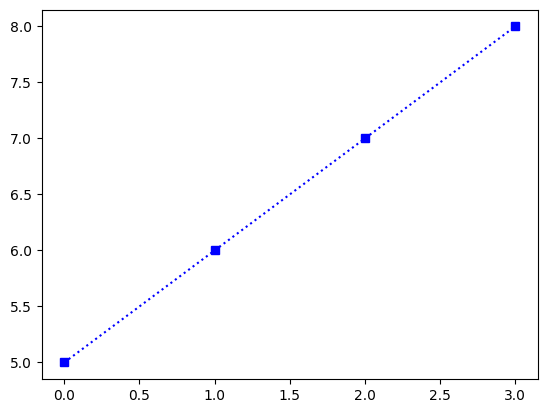

In [141]:
plt.plot([0, 1, 2, 3], [5, 6, 7, 8], 'bs:')

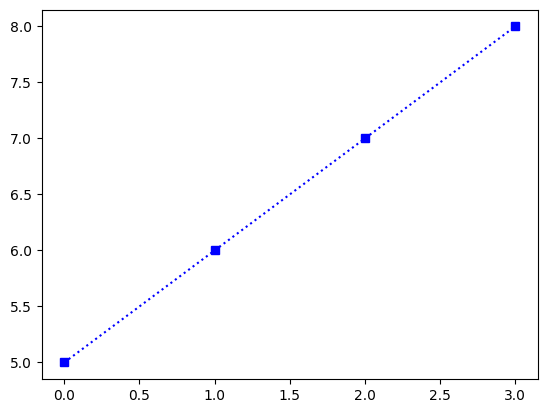

In [142]:
plt.plot([5, 6, 7, 8], 'bs:') # In this case, it create the values of axis x from 0, step 1

### Draw multiple lines

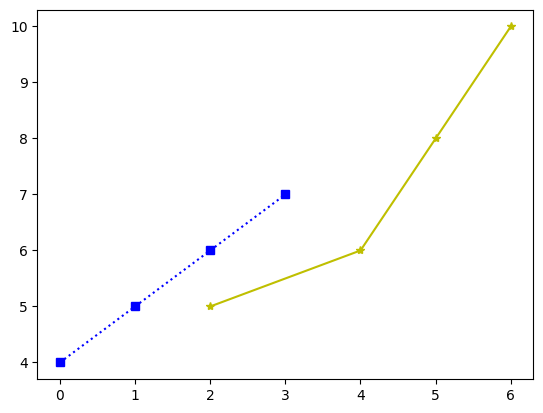

In [143]:
plt.plot(
    [0, 1, 2, 3], [4, 5, 6, 7], 'sb:', # First line
    [2, 4, 5, 6], [5, 6, 8, 10], 'y-*', # Second line
)

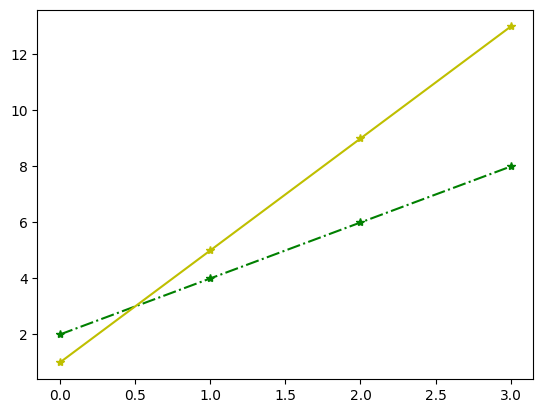

In [144]:
plt.plot([2, 4, 6, 8], 'g-.*', [1, 5, 9, 13], 'y-*')

### Markersize, linewidth

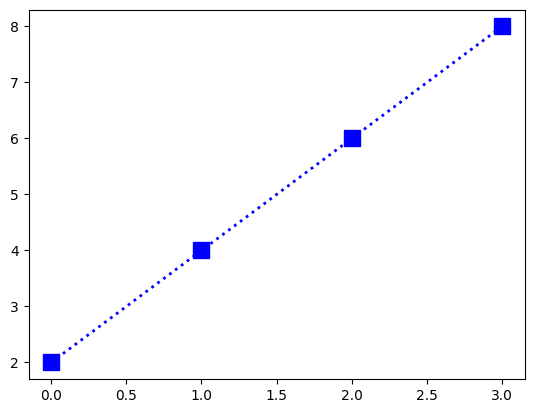

In [145]:
plt.plot([2, 4, 6, 8], 'bs:', markersize=12, linewidth=2);

### Figure

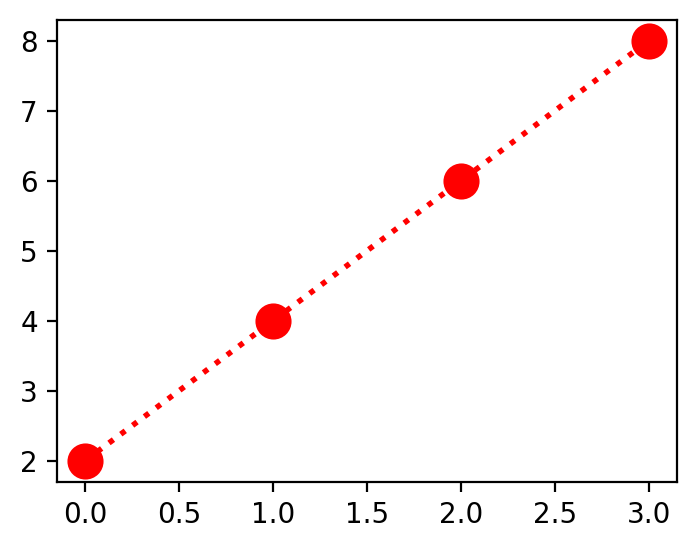

In [146]:
plt.figure(figsize=(4, 3), dpi=200)
plt.plot([2, 4, 6, 8], 'ro:', markersize=12, linewidth=2);
plt.savefig('lineplot5.png')

### text, legend

Text(0.5, 0.98, 'This is the figure title')

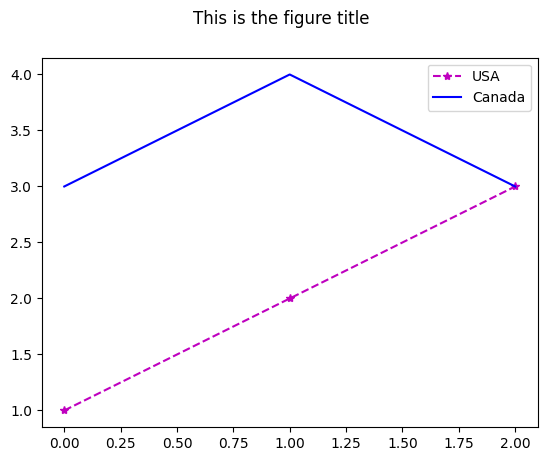

In [147]:
fig3 = plt.figure()
plt.plot([1, 2, 3], 'm*--', label="USA")
plt.plot([3, 4, 3], 'b-', label="Canada")
plt.legend()
fig3.suptitle("This is the figure title")

Text(0, 0.5, 'This is y-axis')

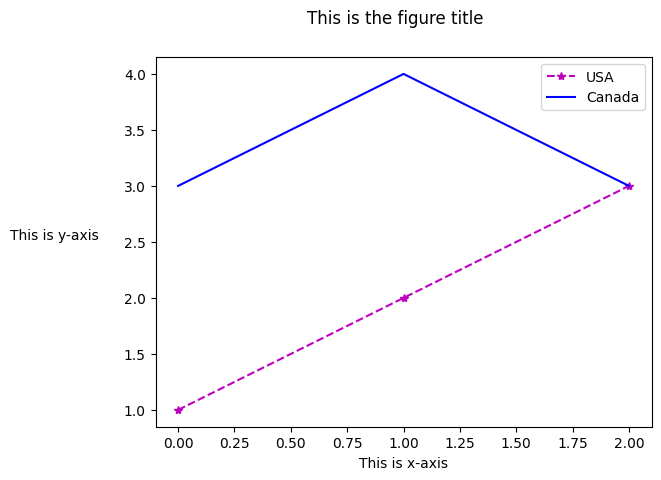

In [148]:
plt.figure()
plt.plot([1, 2, 3], 'm*--', label="USA")
plt.plot([3, 4, 3], 'b-', label="Canada")
plt.legend()
plt.suptitle("This is the figure title")
plt.xlabel("This is x-axis")
plt.ylabel("This is y-axis", rotation=0, labelpad=50) # labelpad = distance from the chart

In [149]:
# stockprices.csv
import pandas as pd

df = pd.read_csv('./stockprices.csv')
df.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [162]:
grouped_df = df.groupby(['date', 'Name'])[['open', 'high', 'low', 'close', 'volume']].agg('mean').reset_index()
names = df['Name'].unique()
colors = ['r', 'g', 'b', 'y', 'm']

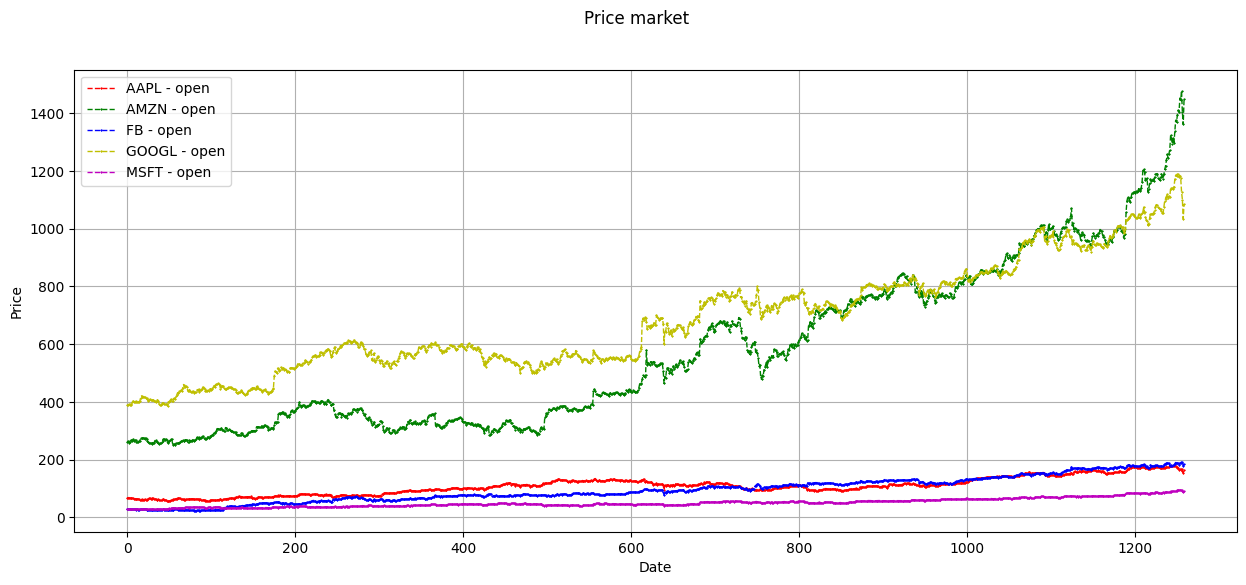

In [174]:
def create_graph(df, name, color):
    # 
    x = np.arange(len(df))

    open_data = df['open']
    high_data = df['high']
    low_data = df['low']
    close_data = df['close']
    volume_data = df['volume']

    line_width = 1
    marker_size = 1

    plt.plot(x, open_data, f'{color}*--', label=f"{name} - open", markersize=marker_size, linewidth=line_width)
    #plt.plot(x, high_data, 'g*--', label="high", markersize=marker_size, linewidth=line_width)
    #plt.plot(x, low_data, 'b*--', label="low", markersize=marker_size, linewidth=line_width)
    #plt.plot(x, close_data, 'y*--', label="close", markersize=marker_size, linewidth=line_width)
    #plt.plot(x, volume_data, 'm*--', label="volume")
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.suptitle("Price market")
    plt.savefig('prices.png')
    # plt.xticks(x, df.groupby('date')['date'].unique());

plt.figure(figsize=(15, 6))
for i in range(len(names)):
    name = names[i]
    name_df = grouped_df[grouped_df['Name'] == name]
    create_graph(name_df, name, colors[i])
plt.grid()

### (II) Bar graphs

`plt.bar(x, height, [width])`

- `x` **list of** x coords where the bars are vertically oriented
- `height` **list of** heights of each bar
- `width`: width of eacg bar, Default 0.8

<br />
Horizontal bar graph: `plt.barh`


Text(0.5, 0.98, 'Subtitle')

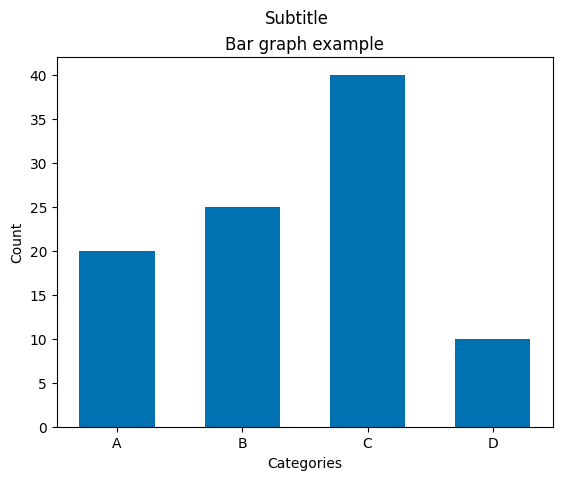

In [ ]:
plt.bar(['A', 'B', 'C', 'D'], [20, 25, 40, 10], width=0.6)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar graph example')
plt.suptitle('Subtitle')

Text(0.5, 0.98, 'Subtitle')

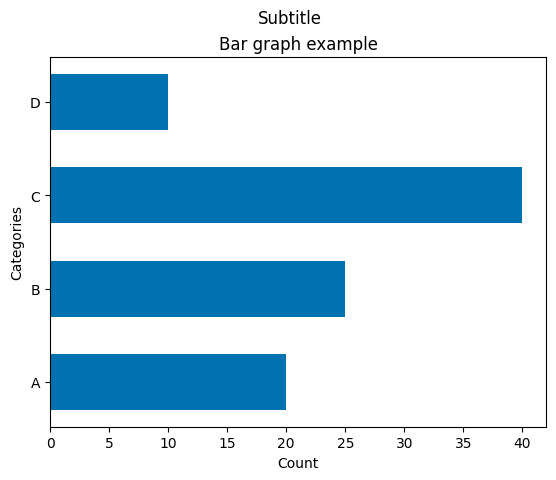

In [ ]:
plt.barh(['A', 'B', 'C', 'D'], [20, 25, 40, 10], height=0.6)
plt.ylabel('Categories')
plt.xlabel('Count')
plt.title('Bar graph example')
plt.suptitle('Subtitle')

### Grouped bar graph

ie
* Form a vertical graph: Each category on the x-axis has multiple sub-categories.
* Form a horizonral graph: Each category on the y-axis has multiple sub-categories.

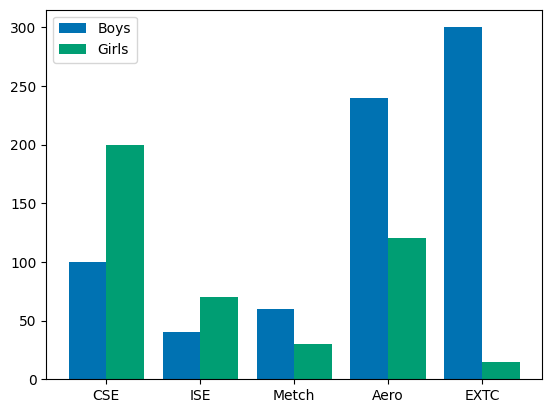

In [ ]:
course_list = ["CSE", "ISE", "Metch", "Aero", "EXTC"]
boys_enrollments = [100, 40, 60, 240, 300]
girls_enrollments = [200, 70, 30, 120, 15]
bar_width = 0.4

bar_centers_boys = np.arange(len(course_list))
bar_centers_girs = bar_centers_boys + bar_width # This sum is possible because it is an numpy array
#bar_centers_girs = [(i + bar_width) for i in bar_centers_boys]

plt.bar(bar_centers_boys, boys_enrollments, bar_width, label="Boys")
plt.bar(bar_centers_girs, girls_enrollments, bar_width, label="Girls")
plt.xticks(bar_centers_boys + (bar_width / 2), course_list) # Set the text instead on numbers
plt.legend()

In [164]:
grouped_df_2 = df.groupby(['Name'])[['open', 'high', 'low', 'close', 'volume']].agg('mean').reset_index()
grouped_df_2

,Name,open,high,low,close,volume
0,AAPL,109.055429,109.951118,108.141589,109.066698,5.404790e+07
1,AMZN,576.867264,582.017221,571.113517,576.880041,3.730465e+06
2,FB,96.455059,97.386739,95.463039,96.478610,3.435927e+07
3,GOOGL,682.357041,687.362776,676.691790,682.233847,2.457501e+06
4,MSFT,51.026394,51.436007,50.630397,51.063081,3.386946e+07


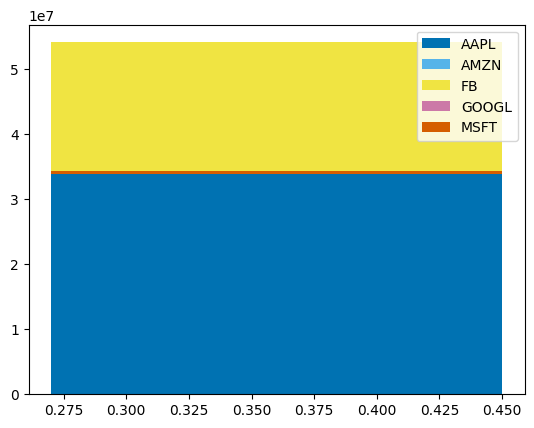

In [172]:
companies = grouped_df_2['Name'].unique()
total_companies = len(companies)
def plot_bar_graph(df, bar_width, company_name, centers):

    for column in ['open', 'high', 'low', 'close', 'volume']:
        y_values = df[column]
        X = centers + bar_width
        if (column == 'open'):
            plt.bar(centers, y_values, bar_width, label=company_name)
        else:
            plt.bar(centers, y_values, bar_width)


bar_total_width = 0.9
bar_width = 0.9 / total_companies

for i in range(total_companies):
    company_name = companies[i]
    company_data = grouped_df_2[grouped_df_2['Name'] == company_name]
    plot_bar_graph(company_data, bar_width, company_name, bar_width * 2)

# plt.xticks(centers + (bar_width / 2), companies) # Set the text instead on numbers
plt.legend()

In [ ]:
sorting, filtering, reshape, combiing, advangates, disadvantages --- 2